In [2]:
import os
import sys

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import pandas as pd

In [6]:
model_path = '/users/Stathis/GoogleDrive/MLP/'

In [25]:
nets =  list(filter(lambda x: os.path.isdir(os.path.join(model_path, x)), os.listdir(model_path)))

In [26]:
nets.sort()
nets = [a for a in dirs if a.split('_')[0] in ['resnet56', 'densenet121']]
nets

['densenet121_cifar10',
 'densenet121_cifar100',
 'densenet121_cifar100_fgsm',
 'densenet121_cifar100_pgd',
 'densenet121_cifar100_to_cifar10',
 'densenet121_cifar10_fgsm',
 'densenet121_cifar10_pgd',
 'resnet56_cifar10',
 'resnet56_cifar100',
 'resnet56_cifar100_fgsm',
 'resnet56_cifar100_fgsm_2',
 'resnet56_cifar100_pgd',
 'resnet56_cifar100_pgd_2',
 'resnet56_cifar100_to_cifar10',
 'resnet56_cifar10_fgsm',
 'resnet56_cifar10_fgsm_2',
 'resnet56_cifar10_pgd',
 'resnet56_cifar10_pgd_2']

In [44]:
summaries = {}
test_results ={}
for net in nets:
    stats_path =  os.path.join(model_path, net) +'/result_outputs'
    data_train = pd.read_csv(stats_path+'/summary.csv', delimiter=",")
    summaries[net] = data_train
    stats_path =  os.path.join(model_path, net) +'/result_outputs'
    data_train = pd.read_csv(stats_path+'/test_summary.csv', delimiter=",")
    test_results[net] = data_train

In [60]:
# for net in nets:
#     print(net)
# #     print(test_results[net].iloc[0])

In [56]:
summaries['resnet56_cifar10'].columns

Index(['train_acc', 'train_loss', 'val_acc', 'val_loss', 'curr_epoch'], dtype='object')

In [65]:
%matplotlib inline

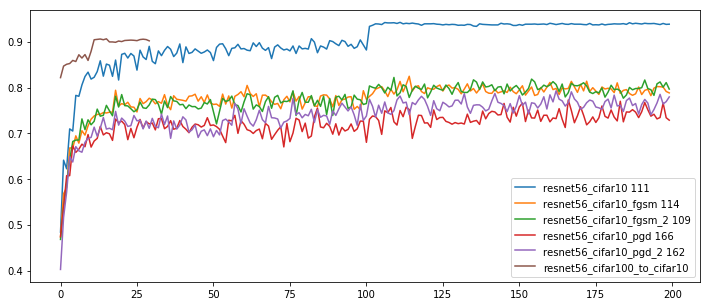

In [93]:
plt.figure(figsize=(12,5))
for net in nets:
    if 'resnet56_cifar10' in net and not 'resnet56_cifar100' in net:
        argmx = summaries[net]['val_acc'][:200].idxmax()
        summaries[net]['val_acc'][:200].plot(label=net + ' %d' % argmx);
net='resnet56_cifar100_to_cifar10'
summaries[net]['val_acc'][:200].plot(label=net);
plt.legend()
plt.show()

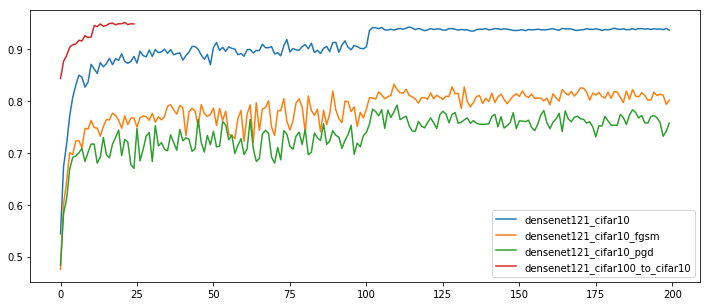

In [85]:
plt.figure(figsize=(12,5))
for net in nets:
    if 'densenet121_cifar10' in net and not 'densenet121_cifar100' in net:
        summaries[net]['val_acc'][:200].plot(label=net);
net='densenet121_cifar100_to_cifar10'
summaries[net]['val_acc'][:200].plot(label=net);
plt.legend()
plt.show()